# Accuracy, Efficiency, Robustness


In [1]:
import math, numpy as np
from math import pi as π
import matplotlib.pyplot as plt

"""
This code imports the math and numpy libraries and assigns the value of pi to the variable π.
"""
import math, numpy as np


In [3]:
π

3.141592653589793

In [4]:
π.hex()

'0x1.921fb54442d18p+1'

In [5]:
math.cos(π/2)

6.123233995736766e-17

# We want our algorithms to run as quickly as possible to achieve efficiency

In [6]:
x = 1
%time math.cos(1)

CPU times: user 5 µs, sys: 1 µs, total: 6 µs
Wall time: 6.91 µs


0.5403023058681398

In [7]:
%timeit math.cos(1) #we can see that the math module is fast on single operations

100 ns ± 7.71 ns per loop (mean ± std. dev. of 7 runs, 10,000,000 loops each)


In [8]:
%timeit np.cos(1)

1.1 µs ± 3.51 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)


In [9]:
θ = np.linspace(0,2*π,721)

In [10]:
%timeit np.cos(θ)

5.02 µs ± 16.8 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


In [11]:
%timeit [math.cos(θk) for θk in θ] #We can see that numpy is faster when we are working with arrays

113 µs ± 659 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


### We would like our algorithms to work well in any context or be able to recongnize contexts where there might be a problem; this is robustness

## Chapter 2
We have gone over binary64 and binary 32

### Accumulated roundoff error

In [4]:
n = 1000
tmp = np.random.standard_normal(n)
tmp.sum()/n

-0.011671182741624247

In [5]:
tmp.std()

0.9723211363113835

(array([  4.,  11.,  61., 112., 226., 227., 195., 117.,  35.,  12.]),
 array([-3.30110874, -2.69112356, -2.08113839, -1.47115321, -0.86116804,
        -0.25118287,  0.35880231,  0.96878748,  1.57877266,  2.18875783,
         2.79874301]),
 <BarContainer object of 10 artists>)

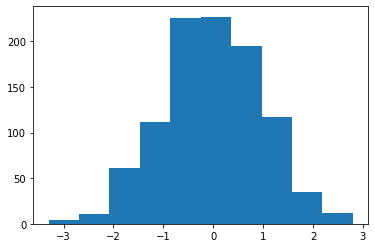

In [6]:
plt.hist(tmp)

In [7]:
x32 = np.array(tmp,dtype=np.float32) #this is changing our values in tmp from binary64 to binary32

In [8]:
type(x32[0])

numpy.float32

In [10]:
float(x32[0]).hex()

'-0x1.803b420000000p-2'

In [11]:
s32 = x32.sum()
s32

-11.671185

In [13]:
x64 = np.array(x32,dtype=np.float64)
type(x64[0])

numpy.float64

In [14]:
x64[0].hex()

'-0x1.803b420000000p-2'

In [15]:
tmp[0].hex()

'-0x1.803b427afe482p-2'

In [17]:
s64 = x64.sum()
s64.hex()

'-0x1.757a552e84000p+3'

In [18]:
s32 - s64 #approximately the error in s32

-1.3438693713396788e-06

In [35]:
n = 100
tmp = np.random.standard_normal(n)
x32 = np.array(tmp, dtype=np.float32)
x64 = np.array(x32, dtype=np.float64)
s32 = x32.sum()
s64 = x64.sum()
err = s32 - s64
err

6.966292858123779e-07

In [36]:
n = 1000
tmp = np.random.standard_normal(n)
x32 = np.array(tmp, dtype=np.float32)
x64 = np.array(x32, dtype=np.float64)
s32 = x32.sum()
s64 = x64.sum()
err = s32 - s64
err

-7.264316082000732e-07

In [38]:
n = 1000000
tmp = np.random.standard_normal(n)
x32 = np.array(tmp, dtype=np.float32)
x64 = np.array(x32, dtype=np.float64)
s32 = x32.sum()
s64 = x64.sum()
err = s32 - s64
err

-0.0005204642361604783

### We see that the error increases with n as the s64 becomes less accurate as well.

if s64 is perfectly accurate then upper bound error is $$ 2^{23} $$ 